In [1]:
sequence_key = 'p7s1'
camera_number = 1
calibraton_file_path = f"gait3d\\Sequences\\{sequence_key}\\Calibration\\c{camera_number}.xml"
calibraton_file_path

'gait3d\\Sequences\\p7s1\\Calibration\\c1.xml'

In [2]:
with open(calibraton_file_path) as file:
    xml_calibration_config = file.read()
    print(xml_calibration_config)

<?xml version="1.0" encoding="UTF-8"?>
<Camera name="c1">
	<Geometry width="960" height="540" ncx="9.600000e+002" nfx="9.600000e+002" dx="1.000000e+000" dy="1.000000e+000" dpx="1.000000e+000" dpy="1.000000e+000"/>
	<Intrinsic focal="5.561470e+002" kappa1="2.720130e-007" cx="4.800000e+002" cy="2.700000e+002" sx="1.001630e+000"/>
	<Extrinsic tx="2.564550e+001" ty="6.130300e+002" tz="3.444080e+003" rx="-3.121731e+000" ry="1.353192e+000" rz="1.582054e+000"/>
</Camera>



In [3]:
import xml.etree.ElementTree as ET

tree = ET.parse(calibraton_file_path)
root = tree.getroot()

geometry = root.find('Geometry')
intrinsic = root.find('Intrinsic')
extrinsic = root.find('Extrinsic')

width = int(geometry.get('width'))
height = int(geometry.get('height'))

focal_length = float(intrinsic.get('focal'))
kappa1 = float(intrinsic.get('kappa1'))

cx = float(intrinsic.get('cx'))
cy = float(intrinsic.get('cy'))
sx = float(intrinsic.get('sx'))

tx = float(extrinsic.get('tx'))
ty = float(extrinsic.get('ty'))
tz = float(extrinsic.get('tz'))
rx = float(extrinsic.get('rx'))
ry = float(extrinsic.get('ry'))
rz = float(extrinsic.get('rz'))


In [5]:
import numpy as np
import cv2

camera_matrix = np.array([
    [focal_length, 0, cx],
    [0, focal_length, cy],
    [0, 0, 1]
])

#k1 k2 p1 p2 k3 - assume all except k1 equals 0
distortion_coefficients = np.array([kappa1, 0, 0, 0, 0])

translation_vector = np.array([[tx], [ty], [tz]])
rotation_vector = np.array([rx, ry, rz])
rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

In [6]:
camera_matrix

array([[556.147,   0.   , 480.   ],
       [  0.   , 556.147, 270.   ],
       [  0.   ,   0.   ,   1.   ]])

In [7]:
rotation_vector

array([-3.121731,  1.353192,  1.582054])

In [8]:
rotation_matrix

array([[ 0.43996824, -0.30409532, -0.84495798],
       [-0.78761218, -0.582669  , -0.2004093 ],
       [-0.43138729,  0.75367292, -0.49586503]])

In [9]:
translation_vector

array([[  25.6455],
       [ 613.03  ],
       [3444.08  ]])

In [10]:
sample_img_path = './sample_imgs/c1_0090_90.jpg'
image = cv2.imread(sample_img_path)
undistorted_image = cv2.undistort(image, camera_matrix, distortion_coefficients)

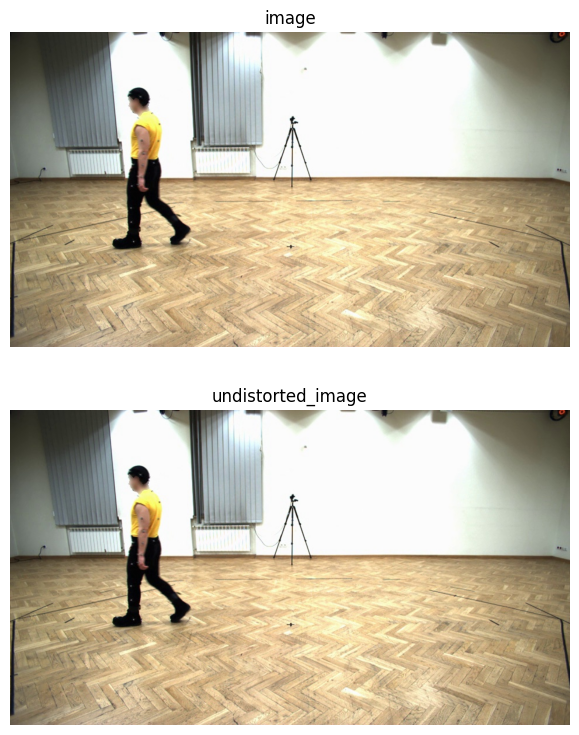

In [11]:
import matplotlib.pyplot as plt

def show_images(image, undistorted_image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    undistorted_image_rgb = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(16, 9))
    plt.subplot(2, 1, 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plt.imshow(undistorted_image_rgb)
    plt.axis('off')
    plt.title("undistorted_image")
    
    plt.show()

show_images(image, undistorted_image)

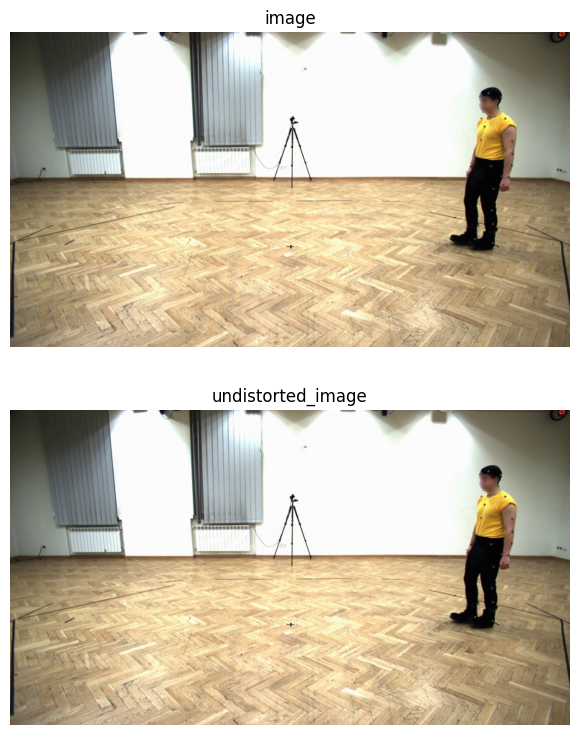

In [12]:
sample_img_path = './sample_imgs/c1_0090_10.jpg'
image = cv2.imread(sample_img_path)
undistorted_image = cv2.undistort(image, camera_matrix, distortion_coefficients)
cv2.imwrite('./sample_imgs/c1_0090_10_undistorted.jpg', undistorted_image)
show_images(image, undistorted_image)